In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import the data
df = pd.read_csv('data/clean_data.csv', index_col=0)

In [4]:
df

,user_id,user_login,game_name,title,viewer_count,language,is_mature
0,71092938,xqcow,Just Chatting,HOURLY FULL DAY STREAM - WOW - IM THE WARLORD ...,63119,en,False
1,50988750,stylishnoob4,Apex Legends,久しぶりにapex 22:00～ 3人ランク,30061,ja,False
2,43691,faker,League of Legends,T1 Faker Soloque RAGE - Tryndamere -,28357,ko,False
3,223191589,tubbo,Just Chatting,"Day 7 The Subathon HELP ME ""Tubbathon""",25683,en,False
4,49207184,fps_shaka,VALORANT,ハレル,24377,ja,False
...,...,...,...,...,...,...,...
10064,694037269,m_kwon,Destiny 2,[3040]신봉자의 서약 막넴 2번째 캐릭~☆,15,ko,False
10065,96399830,dioxis,Mass Effect: Andromeda,✯ odpoczywamy od czołgów... ✯ [7.03] ✯ [PL/18+...,15,pl,True
10066,175863844,kelep,World of Warcraft,쐐기갑니다(탱커),14,ko,False
10067,500992334,theunitedcityfm,Football Manager 2022,FM22 - Road to Valhalla (Nordic Glory Hunter) ...,13,en,False


In [5]:
df.describe()

,user_id,viewer_count
count,9.864000e+03,9864.000000
mean,2.692185e+08,236.649027
std,2.269071e+08,1157.818362
min,1.184200e+04,0.000000
25%,8.680556e+07,25.000000
50%,1.652255e+08,46.000000
75%,4.709164e+08,115.000000
max,7.782677e+08,63119.000000


<AxesSubplot:>

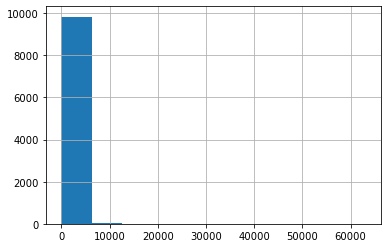

In [6]:
df.viewer_count.hist()

<AxesSubplot:>

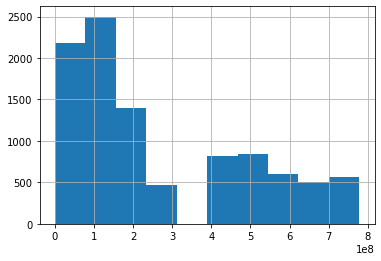

In [7]:
df.user_id.hist()

<AxesSubplot:>

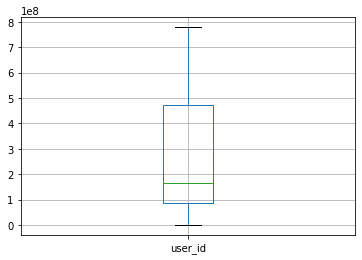

In [8]:
df.boxplot(column='user_id')

<AxesSubplot:>

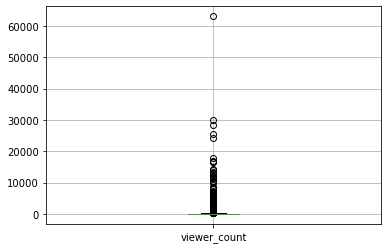

In [9]:
df.boxplot(column='viewer_count')

In [10]:
df[['viewer_count', 'user_id']].corr()

,viewer_count,user_id
viewer_count,1.000000,-0.085282
user_id,-0.085282,1.000000


<AxesSubplot:>

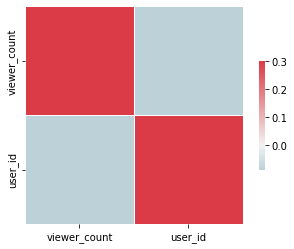

In [11]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['viewer_count', 'user_id']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [12]:
df.columns

Index(['user_id', 'user_login', 'game_name', 'title', 'viewer_count',
       'language', 'is_mature'],
      dtype='object')

In [13]:
df_cat = df[['game_name', 'language', 'is_mature']]
df.language.value_counts().sort_values(ascending=False)[:20]

en       3534
ko        899
ru        882
de        772
es        694
pt        522
fr        515
zh        386
ja        316
it        250
tr        169
pl        168
th        162
ar        104
cs         88
hu         62
fi         56
sv         42
other      41
da         34
Name: language, dtype: int64

graph for game_name, total: 20


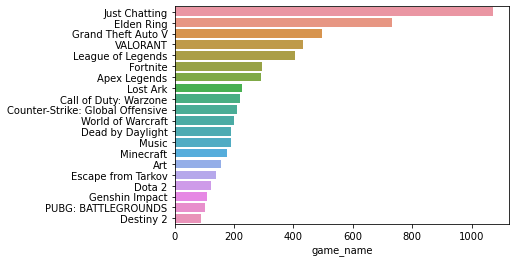

graph for language, total: 20


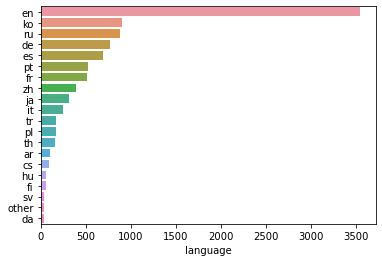

graph for is_mature, total: 2


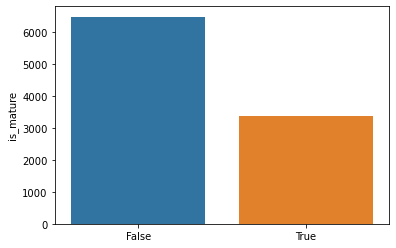

In [14]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts().sort_values(ascending=False)[:20]
    print(f'graph for {i}, total: {cat_num.count()}')
    if (i == "is_mature"):
        chart = sns.barplot(x=cat_num.index, y=cat_num)
    else:
        chart = sns.barplot(y=cat_num.index, x=cat_num)
    plt.show()

In [15]:
# filtering games with too low amount of streamers
popular_games = set(df.game_name.value_counts()[df.game_name.value_counts() > 50].index)
df_popular_games = df[df.game_name.isin(popular_games)]

pd.pivot_table(df_popular_games, index='game_name', values='viewer_count', aggfunc='mean').sort_values(by='viewer_count', ascending=False)

,viewer_count
game_name,
Hearthstone,570.706897
League of Legends,468.876847
Slots,422.285714
Teamfight Tactics,406.987342
World of Tanks,385.362069
VALORANT,384.703704
FIFA 22,360.144578
Just Chatting,359.328984
Apex Legends,325.264605


In [34]:
# filtering languages with too low amount of streamers
popular_lngs = set(df.language.value_counts()[df.language.value_counts() > 20].index)
df_popular_lngs = df[df.language.isin(popular_lngs)]

pd.pivot_table(df_popular_lngs, index='language', values='viewer_count', aggfunc=['mean', 'count']).sort_values(by=('mean', 'viewer_count'), ascending=False)

,mean,count
,viewer_count,viewer_count
language,,
ja,436.291139,316
ko,318.282536,899
pl,293.500000,168
th,283.981481,162
zh,267.567358,386
es,246.703170,694
en,245.193265,3534
fr,238.005825,515


In [22]:
pd.pivot_table(df, index='is_mature', values='viewer_count')

,viewer_count
is_mature,
False,279.586702
True,154.353933


In [49]:
pt = pd.pivot_table(df, index=['language', 'is_mature'], values='viewer_count', aggfunc=['count', 'mean'])
pt[pt['count', 'viewer_count'] > 5]

count         mean
                   viewer_count viewer_count
language is_mature                          
ar       False               72   117.805556
         True                32    41.937500
bg       False                9    89.777778
cs       False               44   185.886364
         True                44   114.522727
da       False               26    87.153846
         True                 8    36.250000
de       False              334   230.185629
         True               438   141.315068
el       False               13   167.384615
         True                 8    56.375000
en       False             1962   310.390418
         True              1572   163.821247
es       False              519   290.736031
         True               175   116.114286
fi       False               33   177.909091
         True                23   200.652174
fr       False              306   316.928105
         True               209   122.454545
hu       False               26    91.115385
         True                36   203.027778
it       False              217   214.119816
         True                33   117.848485
ja       False              293   467.003413
         True                23    45.043478
ko       False              857   320.915986
         True                42   264.547619
nl       False               24   196.166667
         True                 7    51.000000
no       False               12    32.583333
         True                 8    69.250000
other    False               35   122.657143
         True                 6   335.666667
pl       False              135   344.155556
         True                33    86.272727
pt       False              297   179.144781
         True               225   142.004444
ro       False                6    81.833333
         True                13    48.615385
ru       False              682   204.706745
         True               200   152.210000
sk       False                9    58.444444
sv       False               23   171.304348
         True                19   162.684211
th       False              142   312.190141
         True                20    83.700000
tr       False              110   165.172727
         True                59   256.372881
zh       False              263   276.498099
         True               123   248.471545
zh-hk    False               18    42.444444
         True                10    83.100000

In [39]:
pd.set_option('display.max_rows', None)

pt = pd.pivot_table(df, index=['game_name', 'language'], values='viewer_count', aggfunc=['mean', 'count']).sort_values(by=['game_name', ('mean', 'viewer_count')], ascending=[True, False])
pt[pt['count', 'viewer_count'] >= 10]


mean        count
                                          viewer_count viewer_count
game_name                        language                          
ASMR                             en         318.657895           38
Always On                        en          44.454545           11
Animal Crossing: New Horizons    en          64.291667           24
Animals, Aquariums, and Zoos     en          84.000000           26
Apex Legends                     ja        1435.588235           34
                                 en         247.611570          121
                                 fr         229.200000           20
                                 zh         124.050000           40
                                 de         115.700000           10
                                 ru          58.785714           14
Art                              en          75.094595           74
                                 fr          52.583333           12
                                 ko          51.941176           17
                                 es          48.642857           14
                                 pt          24.300000           10
Call Of Duty: Modern Warfare     en          65.785714           14
Call of Duty: Black Ops Cold War en          37.750000           12
Call of Duty: Vanguard           en          57.545455           11
Call of Duty: Warzone            fr         361.578947           19
                                 en         242.402174           92
                                 it         228.500000           16
                                 es         222.133333           15
                                 de         136.458333           24
                                 pt         121.428571           14
                                 ru          63.363636           11
Chess                            en        1469.529412           17
Counter-Strike: Global Offensive en         562.720000           25
                                 pt         314.160000           25
                                 sv         283.300000           10
                                 ru         225.367089           79
                                 pl         198.153846           13
                                 es         143.000000           11
Crypto                           en         117.000000           11
DayZ                             en         312.642857           14
Dead by Daylight                 ko         315.230769           13
                                 es         256.333333           21
                                 en         132.283333           60
                                 ru          93.066667           15
                                 zh          92.700000           10
                                 de          90.920000           25
                                 ja          36.125000           16
Destiny 2                        en         199.614035           57
Dota 2                           en         735.962963           27
                                 ru         123.583333           72
Elden Ring                       zh         510.014706           68
                                 ko         398.714286           91
                                 en         337.621399          243
                                 es         301.303030           33
                                 fr         227.184211           38
                                 ar         209.454545           11
                                 ru         203.596774           62
                                 it         202.052632           19
                                 de         164.943396           53
                                 ja         138.128205           39
                                 pt          99.200000           30
                                 zh-hk       52.416667           12
Escape from Tarkov               ru   

In [40]:
pt = pd.pivot_table(df, index=['language', 'game_name'], values='viewer_count', aggfunc=['mean', 'count']).sort_values(by=['language', ('mean', 'viewer_count')], ascending=[True, False])
pt[pt['count', 'viewer_count'] >= 10]

mean        count
                                          viewer_count viewer_count
language game_name                                                 
ar       Elden Ring                         209.454545           11
         Grand Theft Auto V                 135.692308           13
         Fortnite                           120.461538           13
         Just Chatting                       73.615385           13
         VALORANT                            70.333333           12
cs       Just Chatting                      283.600000           10
de       League of Legends                  867.625000           16
         VALORANT                           368.391304           46
         Slots                              356.800000           10
         Grand Theft Auto V                 278.484848           66
         Music                              244.545455           22
         Fortnite                           212.852941           34
         Just Chatting                      200.267606           71
         Elden Ring                         164.943396           53
         Lost Ark                           148.083333           24
         Call of Duty: Warzone              136.458333           24
         Minecraft                          127.791667           24
         Escape from Tarkov                 117.727273           11
         Apex Legends                       115.700000           10
         Dead by Daylight                    90.920000           25
         World of Warcraft                   71.333333           18
         Gran Turismo 7                      63.000000           11
en       Chess                             1469.529412           17
         World of Tanks                    1213.692308           13
         Teamfight Tactics                  870.062500           16
         Dota 2                             735.962963           27
         Slots                              630.516129           31
         Just Chatting                      581.488372          258
         Counter-Strike: Global Offensive   562.720000           25
         FIFA 22                            555.500000           24
         Hearthstone                        502.210526           19
         League of Legends                  483.846154           65
         Fortnite                           409.594595           74
         World of Warcraft                  368.379747           79
         Lost Ark                           359.051724           58
         Elden Ring                         337.621399          243
         Magic: The Gathering               321.764706           17
         ASMR                               318.657895           38
         Path of Exile                      314.840000           25
         DayZ                               312.642857           14
         VALORANT                           307.547826          115
         Grand Theft Auto V                 270.395349          129
         Apex Legends                       247.611570          121
         Call of Duty: Warzone              242.402174           92
         Overwatch                          239.709677           31
         Talk Shows & Podcasts              238.157895           19
         I'm Only Sleeping                  236.777778           18
         SMITE                              235.611111           18
         Escape from Tarkov                 210.400000           50
         Rust                               204.454545           11
         Destiny 2                          199.614035           57
         WWE 2K22                           194.454545           11
         Gran Turismo 7                     191.636364           11
         Sports                             173.956522           23
         Hunt: Showdown                     169.416667           12
         Tom Clancy's Rainbow Six Siege     167.666667           15
         Minecraft                    

In [18]:
# creating word cloud from stream names
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /Users/dima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dima/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
words = " ".join(df['title'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set()
    stopwords_lngs = ['arabic', 
 'azerbaijani', 
 'danish', 
 'dutch', 
 'english', 
 'finnish', 
 'french', 
 'german', 
 'greek',
 'hungarian', 
 'indonesian', 
 'italian', 
 'kazakh', 
 'nepali', 
 'norwegian', 
 'portuguese', 
 'romanian', 
 'russian', 
 'slovene', 
 'spanish', 
 'swedish', 
 'tajik', 
 'turkish']
    for i in stopwords_lngs: 
        stop_words = stop_words.union(set(nltk.corpus.stopwords.words(i)))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)


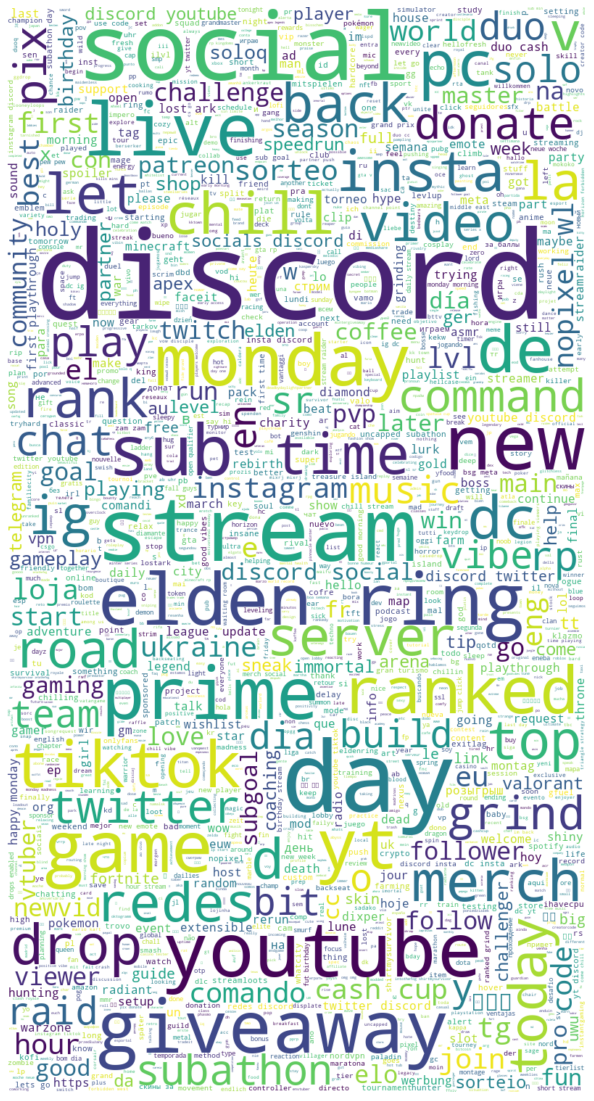

In [21]:
plt.figure(figsize=[20,20])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
